# Part A – Exploring a Text Corpus

In [1]:
# A1) Load Hamlet and peek

import nltk
nltk.download("gutenberg")
from nltk.corpus import gutenberg

text = gutenberg.words("shakespeare-hamlet.txt")
print(len(text))          # sanity check: token count
print(text[:50])          # preview first 50 tokens

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/ryangichuru/nltk_data...


37360
['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.', 'Barnardo', '.', 'Who', "'", 's', 'there', '?', 'Fran', '.', 'Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe', 'Bar', '.', 'Long', 'liue', 'the', 'King', 'Fran', '.', 'Barnardo']


[nltk_data]   Unzipping corpora/gutenberg.zip.


[(',', 2892), ('.', 1886), ('the', 860), ("'", 729), ('and', 606), ('of', 576), ('to', 576), (':', 565), ('I', 553), ('you', 479), ('?', 459), ('a', 449), ('my', 435), ('in', 359), ('it', 354), ('Ham', 337), ('is', 304), (';', 298), ('not', 286), ('his', 266)]


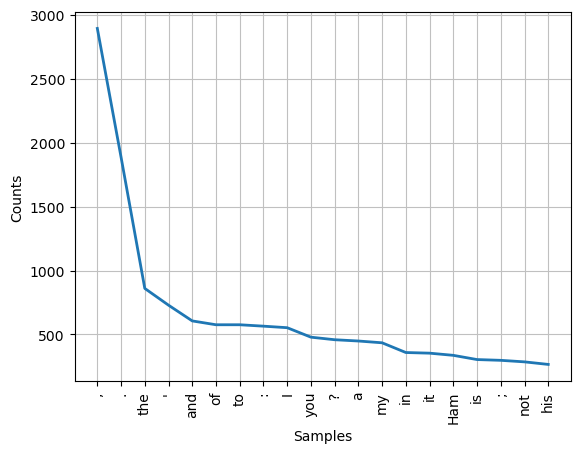

In [2]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(text)
print(fdist.most_common(20))   # raw, unprocessed
fdist.plot(20, cumulative=False)
plt.show()

# Part B – Preprocessing Raw Text

In [3]:
# B1) Lowercase + remove punctuation/non-alphabetic

words_lower = [w.lower() for w in text]
words_alpha = [w for w in words_lower if w.isalpha()]
len(words_alpha), words_alpha[:20]

(30266,
 ['the',
  'tragedie',
  'of',
  'hamlet',
  'by',
  'william',
  'shakespeare',
  'actus',
  'primus',
  'scoena',
  'prima',
  'enter',
  'barnardo',
  'and',
  'francisco',
  'two',
  'centinels',
  'barnardo',
  'who',
  's'])

In [4]:
# B2) Remove English stopwords

from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

filtered_words = [w for w in words_alpha if w not in stop_words]
len(filtered_words), filtered_words[:20]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryangichuru/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(15898,
 ['tragedie',
  'hamlet',
  'william',
  'shakespeare',
  'actus',
  'primus',
  'scoena',
  'prima',
  'enter',
  'barnardo',
  'francisco',
  'two',
  'centinels',
  'barnardo',
  'fran',
  'nay',
  'answer',
  'stand',
  'vnfold',
  'selfe'])

[('ham', 337), ('lord', 211), ('haue', 178), ('king', 172), ('thou', 107), ('shall', 107), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 80), ('would', 73), ('well', 71), ('know', 71), ('tis', 69), ('selfe', 68)]


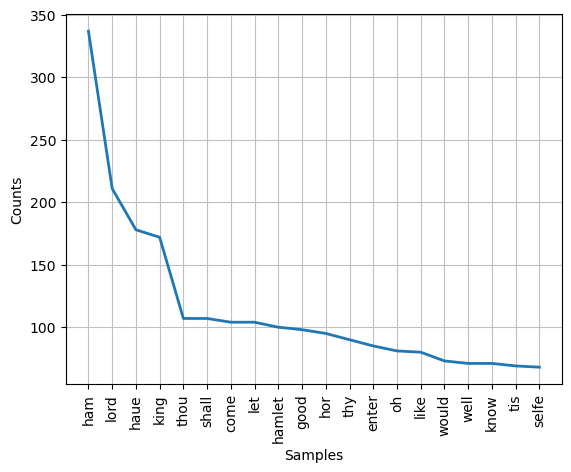

In [5]:
# B3) Recompute Top 20 after preprocessing

fdist_clean = FreqDist(filtered_words)
print(fdist_clean.most_common(20))
fdist_clean.plot(20)
plt.show()

# Part C – Relative Frequencies & Visualisation

In [6]:
# C1) Relative frequency

from collections import Counter

total = len(filtered_words)
counts = Counter(filtered_words)
rel_freq = {w: c/total for w, c in counts.items()}
# Top 20 by relative frequency
top_rel = sorted(rel_freq.items(), key=lambda x: x[1], reverse=True)[:20]
top_rel

[('ham', 0.021197634922631776),
 ('lord', 0.01327210969933325),
 ('haue', 0.011196376902755064),
 ('king', 0.010818970939740848),
 ('thou', 0.006730406340420179),
 ('shall', 0.006730406340420179),
 ('come', 0.0065417033589130705),
 ('let', 0.0065417033589130705),
 ('hamlet', 0.00629009938357026),
 ('good', 0.006164297395898855),
 ('hor', 0.005975594414391747),
 ('thy', 0.0056610894452132346),
 ('enter', 0.005346584476034722),
 ('oh', 0.005094980500691911),
 ('like', 0.005032079506856208),
 ('would', 0.00459177255000629),
 ('well', 0.004465970562334885),
 ('know', 0.004465970562334885),
 ('tis', 0.004340168574663479),
 ('selfe', 0.004277267580827777)]

In [7]:
# (Optional tabular view)

import pandas as pd

df_rel = (pd.Series(rel_freq, name="rel_freq")
            .sort_values(ascending=False)
            .head(20)
            .reset_index()
            .rename(columns={"index": "word"}))
df_rel

,word,rel_freq
0,ham,0.021198
1,lord,0.013272
2,haue,0.011196
3,king,0.010819
4,thou,0.006730
5,shall,0.006730
6,come,0.006542
7,let,0.006542
8,hamlet,0.006290
9,good,0.006164


In [8]:
# Run magic command if you dont have wordcloud installed

%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


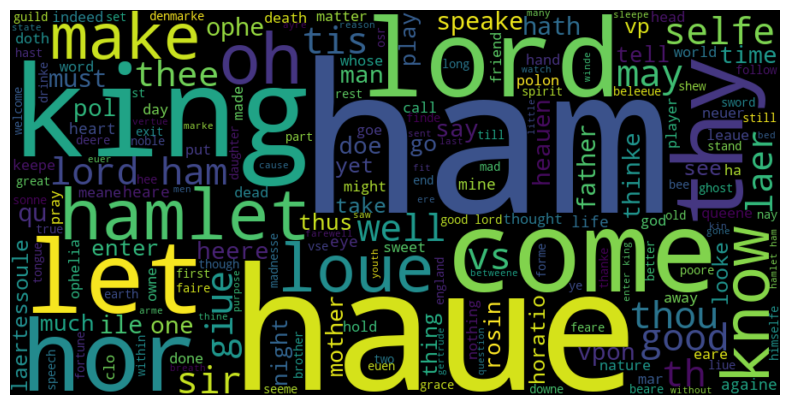

In [9]:
# C2) Wordcloud (from cleaned tokens)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=900, height=450).generate(" ".join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Part D – Extension: Compare Two Texts

In [10]:
from nltk.corpus import gutenberg, stopwords
from nltk import FreqDist

# Hamlet (cleaned)
hamlet = gutenberg.words("shakespeare-hamlet.txt")
hamlet = [w.lower() for w in hamlet if w.isalpha()]
sw = set(stopwords.words("english"))
hamlet = [w for w in hamlet if w not in sw]

# Emma (cleaned)
emma = gutenberg.words("austen-emma.txt")
emma = [w.lower() for w in emma if w.isalpha()]
emma = [w for w in emma if w not in sw]

fd_h = FreqDist(hamlet)
fd_e = FreqDist(emma)

print("Hamlet:", fd_h.most_common(10))
print("Emma  :", fd_e.most_common(10))

Hamlet: [('ham', 337), ('lord', 211), ('haue', 178), ('king', 172), ('thou', 107), ('shall', 107), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98)]
Emma  : [('mr', 1153), ('emma', 865), ('could', 837), ('would', 820), ('mrs', 699), ('miss', 599), ('must', 567), ('harriet', 506), ('much', 486), ('said', 484)]


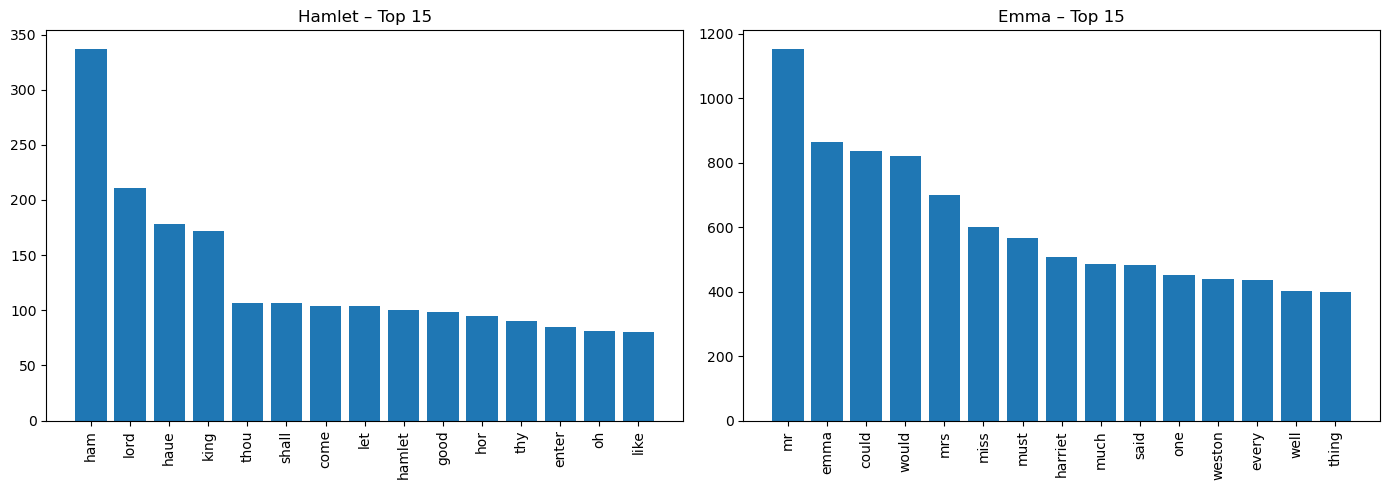

In [11]:
import matplotlib.pyplot as plt

h_words, h_counts = zip(*fd_h.most_common(15))
e_words, e_counts = zip(*fd_e.most_common(15))

plt.close('all')  # optional: clear old figures
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(h_words, h_counts)
axes[0].set_title("Hamlet – Top 15")
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(e_words, e_counts)
axes[1].set_title("Emma – Top 15")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



In [12]:
import nltk
nltk.download("gutenberg")
from nltk.corpus import gutenberg

text = gutenberg.words("shakespeare-hamlet.txt")
print(len(text))
print(text[:50])

37360
['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.', 'Barnardo', '.', 'Who', "'", 's', 'there', '?', 'Fran', '.', 'Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe', 'Bar', '.', 'Long', 'liue', 'the', 'King', 'Fran', '.', 'Barnardo']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/ryangichuru/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


[(',', 2892), ('.', 1886), ('the', 860), ("'", 729), ('and', 606), ('of', 576), ('to', 576), (':', 565), ('I', 553), ('you', 479), ('?', 459), ('a', 449), ('my', 435), ('in', 359), ('it', 354), ('Ham', 337), ('is', 304), (';', 298), ('not', 286), ('his', 266)]


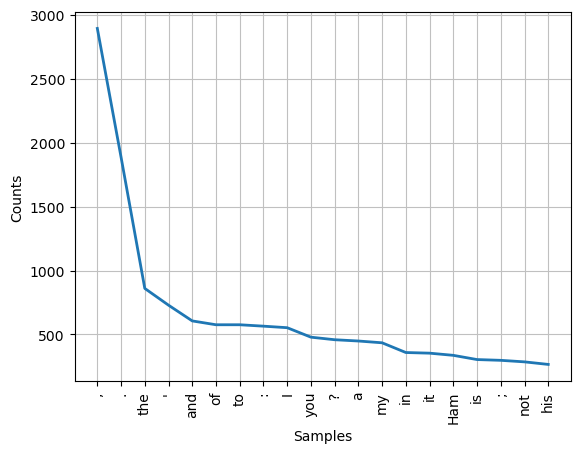

In [13]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(text)
print(fdist.most_common(20))
fdist.plot(20, cumulative=False)
plt.show()

In [14]:
words_lower = [w.lower() for w in text]
words_alpha = [w for w in words_lower if w.isalpha()]

In [15]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

filtered_words = [w for w in words_alpha if w not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryangichuru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('ham', 337), ('lord', 211), ('haue', 178), ('king', 172), ('thou', 107), ('shall', 107), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 80), ('would', 73), ('well', 71), ('know', 71), ('tis', 69), ('selfe', 68)]


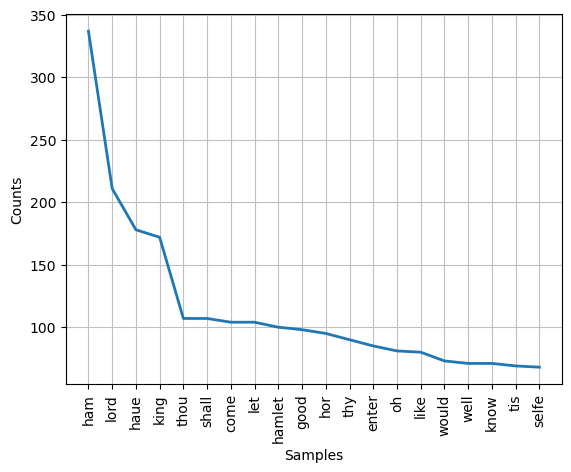

In [16]:
fdist_clean = FreqDist(filtered_words)
print(fdist_clean.most_common(20))
fdist_clean.plot(20)
plt.show()

In [17]:
from collections import Counter

total = len(filtered_words)
counts = Counter(filtered_words)
rel_freq = {w: c/total for w, c in counts.items()}
top_rel = sorted(rel_freq.items(), key=lambda x: x[1], reverse=True)[:20]

In [18]:
df_rel = (pd.Series(rel_freq, name="rel_freq")
            .sort_values(ascending=False)
            .head(20)
            .reset_index()
            .rename(columns={"index": "word"}))
df_rel

,word,rel_freq
0,ham,0.021198
1,lord,0.013272
2,haue,0.011196
3,king,0.010819
4,thou,0.006730
5,shall,0.006730
6,come,0.006542
7,let,0.006542
8,hamlet,0.006290
9,good,0.006164


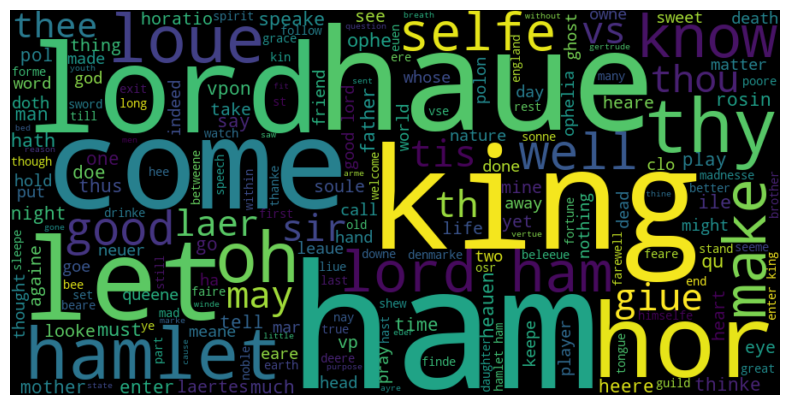

In [19]:
wc = WordCloud(width=900, height=450).generate(" ".join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
hamlet = gutenberg.words("shakespeare-hamlet.txt")
hamlet = [w.lower() for w in hamlet if w.isalpha()]
sw = set(stopwords.words("english"))
hamlet = [w for w in hamlet if w not in sw]

emma = gutenberg.words("austen-emma.txt")
emma = [w.lower() for w in emma if w.isalpha()]
emma = [w for w in emma if w not in sw]

fd_h = FreqDist(hamlet)
fd_e = FreqDist(emma)

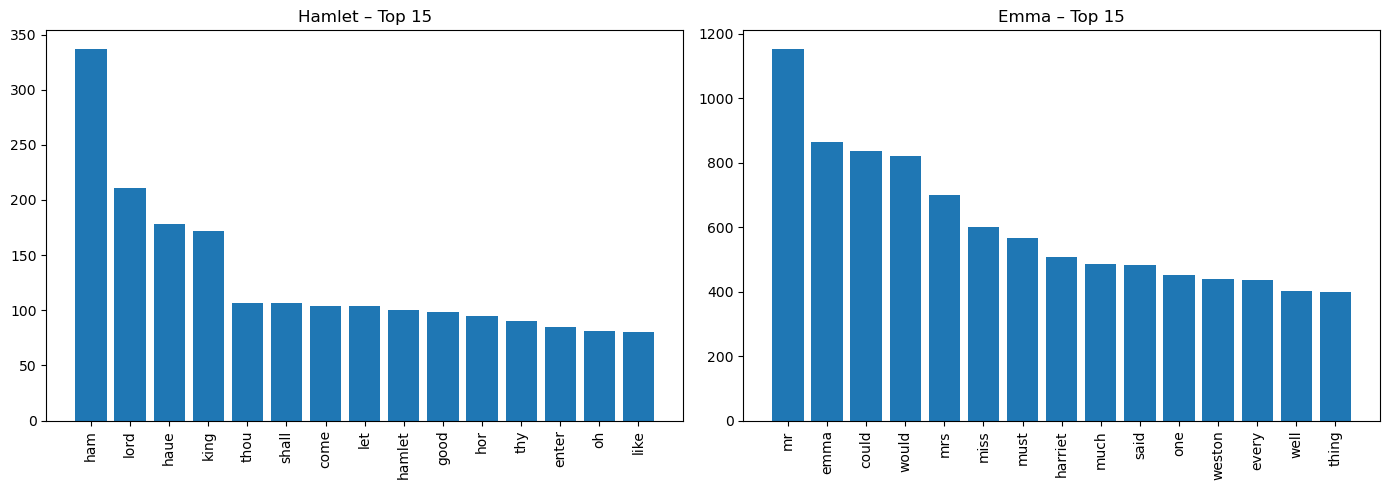

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(h_words, h_counts)
axes[0].set_title("Hamlet – Top 15")
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(e_words, e_counts)
axes[1].set_title("Emma – Top 15")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()